In [1]:
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
df_master = pd.read_csv('DATA_MAHASISWA.csv',sep=';')

In [3]:
df_master

,no,NIM,nama,jk,program_studi,ips_1,ips_2,ips_3,ips_4,ips_5,ips_6,ips_7,ipk,total_sks,pekerjaan,kelulusan
0,1,51113006,DEDE SUKERMAN PANJAITAN,L,ILMU KOMUNIKASI,"2,61","2,36","2,93",2,"2,4","0,67",0,"1,85",120,KARYAWAN,TERLAMBAT
1,2,51113045,FAUZIAH AMALIATUNNISA,P,ILMU KOMUNIKASI,3,"3,11","3,29","2,38","3,45","0,67",0,"2,27",124,MAHASISWA,TERLAMBAT
2,3,51113086,LANI AFFRIYANI,P,ILMU KOMUNIKASI,"3,53","3,27","3,18","3,38","3,32","2,5","3,17","3,19",144,MAHASISWA,TEPAT WAKTU
3,4,51113032,SITI ROCHMAH,P,ILMU KOMUNIKASI,"3,55","3,33","3,25","3,45","3,25","2,58","3,25","3,24",144,MAHASISWA,TEPAT WAKTU
4,5,51113066,SYIFA ANNISA,P,ILMU KOMUNIKASI,"3,32","2,78","2,93","3,08","3,07","2,47","3,14","2,97",142,MAHASISWA,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1110,61117076,SITI HARYANI,P,ILMU HUKUM,"2,9",0,"2,15","2,5","2,96","2,12","2,4","2,15",40,MAHASISWA,TERLAMBAT
1110,1111,61117077,DEVI PARAMITHA,P,ILMU HUKUM,"3,78","3,8","3,54","3,5","3,78","3,96","3,92","3,75",137,MAHASISWA,TEPAT WAKTU
1111,1112,61117079,ANDIKA PERSADA ILAIKA,P,ILMU HUKUM,"3,35","3,15",0,0,"3,34","2,34","2,93","2,16",119,MAHASISWA,TERLAMBAT
1112,1113,61117081,ARDIANTO FEBRIANSYAH,P,ILMU HUKUM,"3,35","3,18","2,96","2,69","2,65","2,66","3,46","2,99",141,MAHASISWA,TERLAMBAT


In [4]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             1114 non-null   int64 
 1   NIM            1114 non-null   object
 2   nama           1114 non-null   object
 3   jk             1114 non-null   object
 4   program_studi  1114 non-null   object
 5   ips_1          1114 non-null   object
 6   ips_2          1114 non-null   object
 7   ips_3          1114 non-null   object
 8   ips_4          1114 non-null   object
 9   ips_5          1114 non-null   object
 10  ips_6          1114 non-null   object
 11  ips_7          1114 non-null   object
 12  ipk            1114 non-null   object
 13  total_sks      1114 non-null   int64 
 14  pekerjaan      1114 non-null   object
 15  kelulusan      1114 non-null   object
dtypes: int64(2), object(14)
memory usage: 139.4+ KB


In [5]:
#pemrosesan data mentah menjadi data siap di proses
def proses_data(df):
    #dropping kolom
    df = df.drop(['no', 'NIM', 'nama','program_studi','ipk'],axis =1)
    
    #pengkodean data text menjadi kode angka
    df['jk'] = df['jk'].str.strip().replace({'L': 0, 'P': 1,})
    df['kelulusan'] = df['kelulusan'].str.strip().replace({'TERLAMBAT': 0, 'TEPAT WAKTU': 1})
    df['pekerjaan'] = df['pekerjaan'].str.strip().replace({'KARYAWAN': 0, 'MAHASISWA': 1})
    
    #mengubah notasi koma menjadi notasi titik
    df['ips_1'] = df['ips_1'].apply(lambda x: x.replace(',','.'))
    df['ips_2'] = df['ips_2'].apply(lambda x: x.replace(',','.'))
    df['ips_3'] = df['ips_3'].apply(lambda x: x.replace(',','.'))
    df['ips_4'] = df['ips_4'].apply(lambda x: x.replace(',','.'))
    df['ips_5'] = df['ips_5'].apply(lambda x: x.replace(',','.'))
    df['ips_6'] = df['ips_6'].apply(lambda x: x.replace(',','.'))
    df['ips_7'] = df['ips_7'].apply(lambda x: x.replace(',','.'))
    
    return df

df = proses_data(df_master)
display(df)

,jk,ips_1,ips_2,ips_3,ips_4,ips_5,ips_6,ips_7,total_sks,pekerjaan,kelulusan
0,0,2.61,2.36,2.93,2,2.4,0.67,0,120,0,0
1,1,3,3.11,3.29,2.38,3.45,0.67,0,124,1,0
2,1,3.53,3.27,3.18,3.38,3.32,2.5,3.17,144,1,1
3,1,3.55,3.33,3.25,3.45,3.25,2.58,3.25,144,1,1
4,1,3.32,2.78,2.93,3.08,3.07,2.47,3.14,142,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1109,1,2.9,0,2.15,2.5,2.96,2.12,2.4,40,1,0
1110,1,3.78,3.8,3.54,3.5,3.78,3.96,3.92,137,1,1
1111,1,3.35,3.15,0,0,3.34,2.34,2.93,119,1,0
1112,1,3.35,3.18,2.96,2.69,2.65,2.66,3.46,141,1,0


<AxesSubplot:title={'center':'0: TERLAMBAT || 1: TEPAT WAKTU'}, xlabel='kelulusan', ylabel='count'>

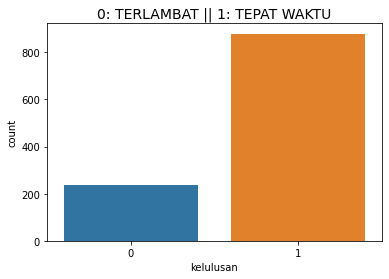

In [6]:
#data
X1 = df.drop(['kelulusan'],axis=1)
#label data
y1 = df['kelulusan']

plt.title('0: TERLAMBAT || 1: TEPAT WAKTU', fontsize=14)
sns.countplot(x ='kelulusan', data=df)


<AxesSubplot:title={'center':'0: TERLAMBAT || 1: TEPAT WAKTU'}, xlabel='kelulusan', ylabel='count'>

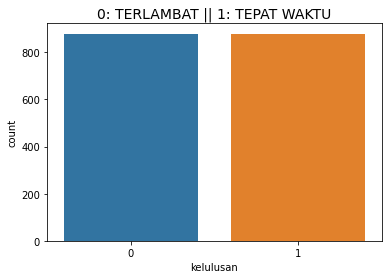

In [7]:
#balancing the data using SMOTE
df2 = pd.DataFrame()
sm = SMOTE()
df2, df2['kelulusan'] = sm.fit_resample(X1,y1)
X2 = df2.drop('kelulusan',axis=1)
y2 = df2['kelulusan']
plt.title('0: TERLAMBAT || 1: TEPAT WAKTU', fontsize=14)
sns.countplot(x ='kelulusan', data=df2)

In [8]:
#df2.to_csv('x2.csv',index=False)

# Decision Tree

Accuracy: 96.68%
Recall TEPAT WAKTU : 96.93%
Recall TERLAMBAT : 95.74%
Precision TEPAT WAKTU : 98.84%
Precision TERLAMBAT : 89.29%


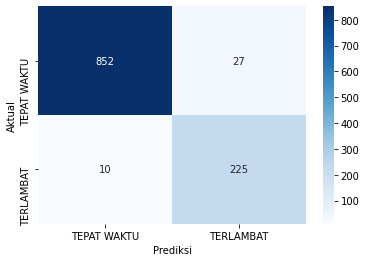

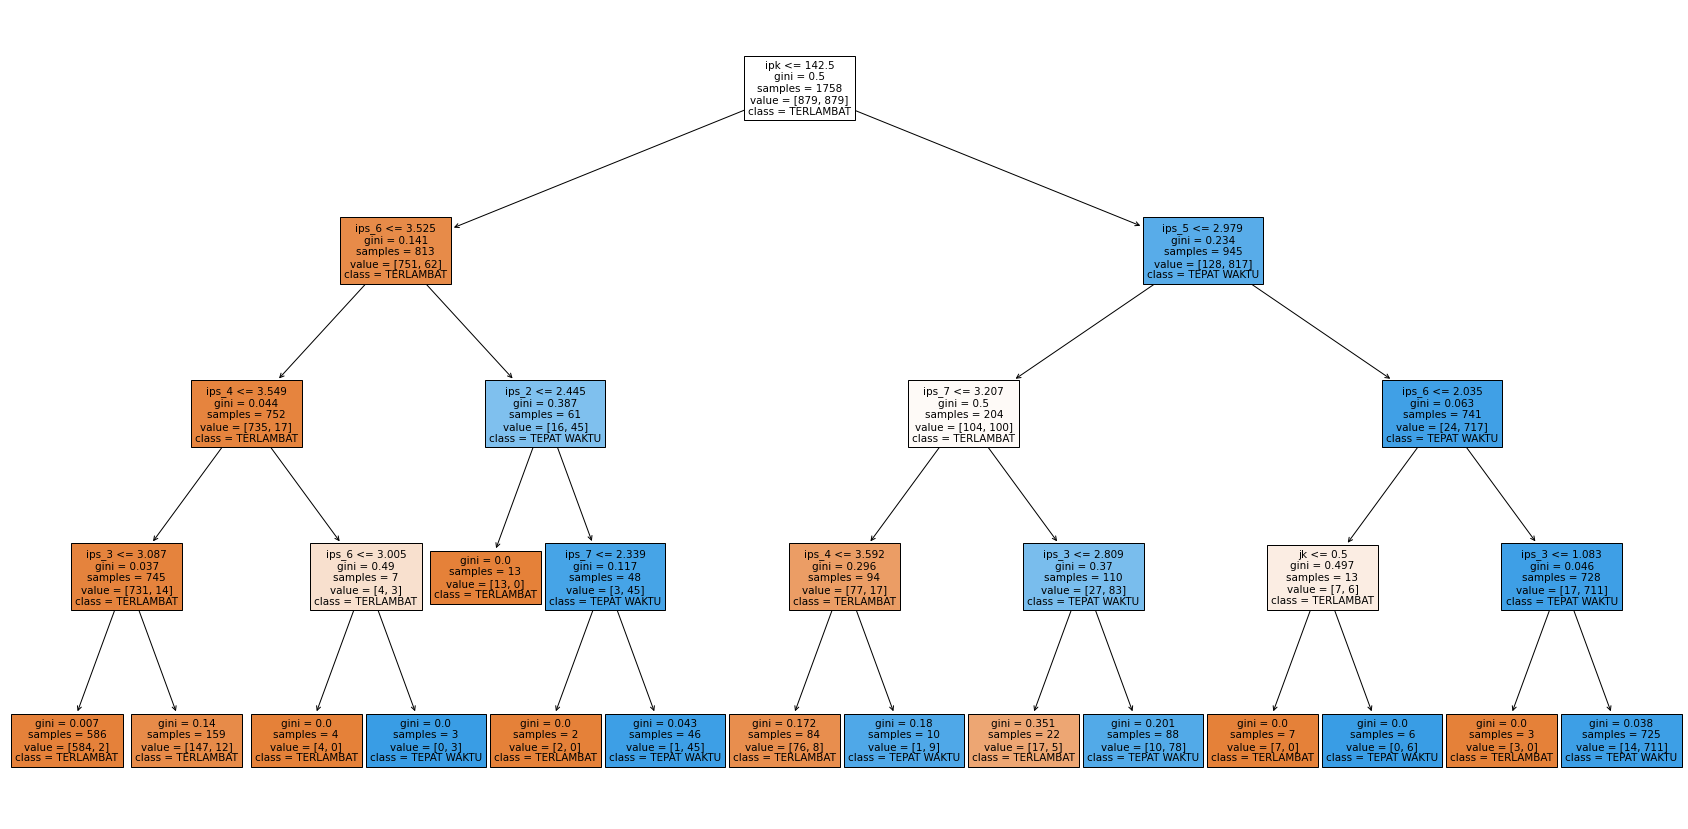

In [9]:
maximal_tree_depth = 4

dfm1 = df_master.copy()
arr_map = {1:'TEPAT WAKTU', 0:'TERLAMBAT'}


dtree_model2 = DecisionTreeClassifier( max_depth = maximal_tree_depth,random_state=None).fit(X2, y2) #hyperparameter
ypred = dtree_model2.predict(X1)

dfm1['prediksi'] = ypred
dfm1['prediksi'] = dfm1['prediksi'].map(arr_map)


recall1 = '{:.2f}%'.format(metrics.recall_score(dfm1['kelulusan'], dfm1['prediksi'],pos_label='TEPAT WAKTU' )*100)
recall2 = '{:.2f}%'.format(metrics.recall_score(dfm1['kelulusan'], dfm1['prediksi'],pos_label='TERLAMBAT' )*100)
precision1 = '{:.2f}%'.format(metrics.precision_score(dfm1['kelulusan'], dfm1['prediksi'],pos_label='TEPAT WAKTU' )*100)
precision2 = '{:.2f}%'.format(metrics.precision_score(dfm1['kelulusan'], dfm1['prediksi'],pos_label='TERLAMBAT' )*100)
accuracy = '{:.2f}%'.format(metrics.accuracy_score(dfm1['kelulusan'], dfm1['prediksi'])*100)
print("Accuracy:",accuracy)
print("Recall TEPAT WAKTU :",recall1)
print("Recall TERLAMBAT :",recall2)
print("Precision TEPAT WAKTU :",precision1)
print("Precision TERLAMBAT :",precision2)

confusionmatrix = pd.crosstab(dfm1['kelulusan'], dfm1['prediksi'], rownames=['Aktual'], colnames=['Prediksi'])
sns.heatmap(confusionmatrix, annot=True, fmt='g',cmap='Blues')
plt.show()

fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(dtree_model2,
                   feature_names=['jk','ips_1', 'ips_2', 'ips_3','ips_4', 'ips_5', 'ips_6', 'ips_7', 'ipk', 'total_sks', 'pekerjaan'],  
                   class_names=['TERLAMBAT','TEPAT WAKTU'],
                   filled=True)
plt.show()

# Naive Bayes

Accuracy: 90.57%
Recall TEPAT WAKTU : 88.28%
Recall TERLAMBAT : 99.15%
Precision TEPAT WAKTU : 99.74%
Precision TERLAMBAT : 69.35%


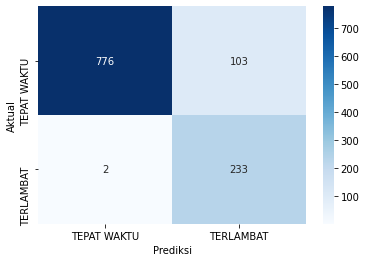

In [10]:

dfm2 = df_master.copy()
model = GaussianNB().fit(X2, y2)
nbpred = model.predict(X1)

dfm2['prediksi'] = nbpred
dfm2['prediksi'] = dfm2['prediksi'].map(arr_map)

cm2 = confusion_matrix(y1, nbpred)

recall1 = '{:.2f}%'.format(metrics.recall_score(dfm2['kelulusan'], dfm2['prediksi'],pos_label='TEPAT WAKTU' )*100)
recall2 = '{:.2f}%'.format(metrics.recall_score(dfm2['kelulusan'], dfm2['prediksi'],pos_label='TERLAMBAT' )*100)
precision1 = '{:.2f}%'.format(metrics.precision_score(dfm2['kelulusan'], dfm2['prediksi'],pos_label='TEPAT WAKTU' )*100)
precision2 = '{:.2f}%'.format(metrics.precision_score(dfm2['kelulusan'], dfm2['prediksi'],pos_label='TERLAMBAT' )*100)
accuracy = '{:.2f}%'.format(metrics.accuracy_score(dfm2['kelulusan'], dfm2['prediksi'])*100)
print("Accuracy:",accuracy)
print("Recall TEPAT WAKTU :",recall1)
print("Recall TERLAMBAT :",recall2)
print("Precision TEPAT WAKTU :",precision1)
print("Precision TERLAMBAT :",precision2)

confusionmatrix = pd.crosstab(dfm2['kelulusan'], dfm2['prediksi'], rownames=['Aktual'], colnames=['Prediksi'])
sns.heatmap(confusionmatrix, annot=True, fmt='g',cmap='Blues')
plt.show()

# KNN

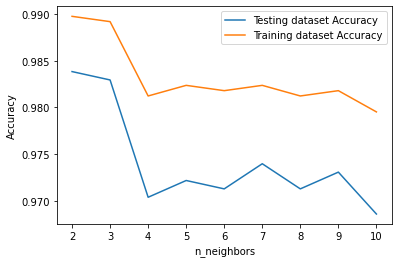

In [11]:
neighbors = np.arange(2, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2, y2)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X2, y2)
    test_accuracy[i] = knn.score(X1, y1)

    
#Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Accuracy: 98.29%
Recall TEPAT WAKTU : 98.07%
Recall TERLAMBAT : 99.15%
Precision TEPAT WAKTU : 99.77%
Precision TERLAMBAT : 93.20%


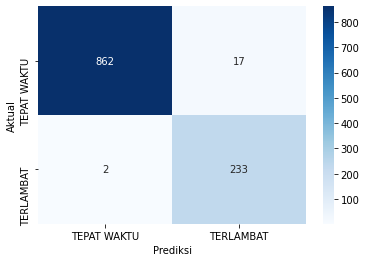

In [12]:
jumlah_n = 3 #hasil perhitungan
knn =  KNeighborsClassifier(n_neighbors=jumlah_n).fit(X2, y2)
knnpred = knn.predict(X1)

dfm3 = df_master.copy()
dfm3['prediksi'] = knnpred
dfm3['prediksi'] = dfm3['prediksi'].map(arr_map)

recall1 = '{:.2f}%'.format(metrics.recall_score(dfm3['kelulusan'], dfm3['prediksi'],pos_label='TEPAT WAKTU' )*100)
recall2 = '{:.2f}%'.format(metrics.recall_score(dfm3['kelulusan'], dfm3['prediksi'],pos_label='TERLAMBAT' )*100)
precision1 = '{:.2f}%'.format(metrics.precision_score(dfm3['kelulusan'], dfm3['prediksi'],pos_label='TEPAT WAKTU' )*100)
precision2 = '{:.2f}%'.format(metrics.precision_score(dfm3['kelulusan'], dfm3['prediksi'],pos_label='TERLAMBAT' )*100)
accuracy = '{:.2f}%'.format(metrics.accuracy_score(dfm3['kelulusan'], dfm3['prediksi'])*100)
print("Accuracy:",accuracy)
print("Recall TEPAT WAKTU :",recall1)
print("Recall TERLAMBAT :",recall2)
print("Precision TEPAT WAKTU :",precision1)
print("Precision TERLAMBAT :",precision2)

confusionmatrix = pd.crosstab(dfm3['kelulusan'], dfm3['prediksi'], rownames=['Aktual'], colnames=['Prediksi'])
sns.heatmap(confusionmatrix, annot=True, fmt='g',cmap='Blues')
plt.show()